In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:/Users/S580381/Documents/GitHub/marketing_camp_rev_pred/data/processed_fb_ad_camps.csv')

In [4]:
df.head()

,Ad_ID,Company_Campaign_ID,FB_campaign_ID,Age,Gender,interest,Impressions,Clicks,Spent,Total_Conversion,Ctr,Cpc,Conversion_Rate,Cpa
0,708746,916,103916,32,M,15,7350,1,1.43,2,0.000136,1.43,2.0,0.715
1,708749,916,103917,32,M,16,17861,2,1.82,2,0.000112,0.91,1.0,0.910
2,708771,916,103920,32,M,20,693,0,0.00,1,0.000000,0.00,0.0,0.000
3,708815,916,103928,32,M,28,4259,1,1.25,1,0.000235,1.25,1.0,1.250
4,708818,916,103928,32,M,28,4133,1,1.29,1,0.000242,1.29,1.0,1.290


# **Missing Values**

In [ ]:
feature_with_na = [features for features in df.columns if df[features].isnull().sum() > 1]

if len(feature_with_na) > 0:
    for feature in feature_with_na:
        print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else: print('No missing values')

No missing values


# **Numerical Variables** 

In [15]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical features: ', len(numerical_features))

df[numerical_features].head()

Number of numerical features:  13


,Ad_ID,Company_Campaign_ID,FB_campaign_ID,Age,interest,Impressions,Clicks,Spent,Total_Conversion,Ctr,Cpc,Conversion_Rate,Cpa
0,708746,916,103916,32,15,7350,1,1.43,2,0.000136,1.43,2.0,0.715
1,708749,916,103917,32,16,17861,2,1.82,2,0.000112,0.91,1.0,0.910
2,708771,916,103920,32,20,693,0,0.00,1,0.000000,0.00,0.0,0.000
3,708815,916,103928,32,28,4259,1,1.25,1,0.000235,1.25,1.0,1.250
4,708818,916,103928,32,28,4133,1,1.29,1,0.000242,1.29,1.0,1.290


**Discrete variables**

In [36]:
# We will check for discrete numerical variables
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in ['Ad_ID']]
print('Number of discrete features: ', len(discrete_features)) 

Number of discrete features:  2


In [37]:
discrete_features

['Company_Campaign_ID', 'Age']

In [38]:
df[discrete_features].head()

,Company_Campaign_ID,Age
0,916,32
1,916,32
2,916,32
3,916,32
4,916,32


**Let's find the relationship between our discrete features and conversions**

C:\Users\S580381\AppData\Local\Temp\ipykernel_4496\2076732905.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='Total_Conversion', data=data, estimator=np.median, hue=feature, ci=None, palette='tab10')


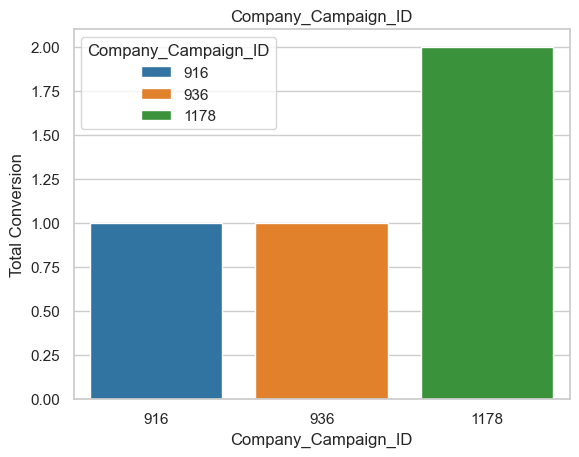

C:\Users\S580381\AppData\Local\Temp\ipykernel_4496\2076732905.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='Total_Conversion', data=data, estimator=np.median, hue=feature, ci=None, palette='tab10')


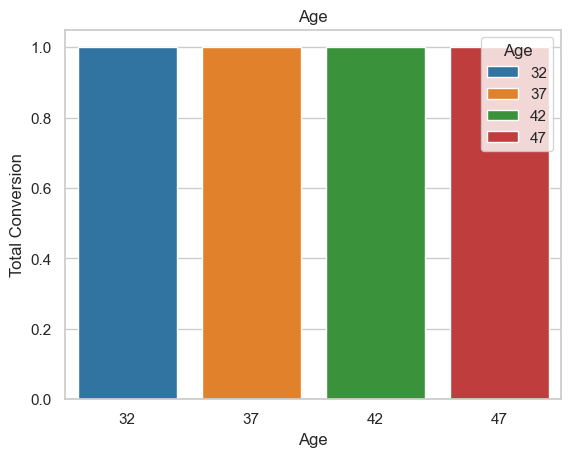

In [39]:
for feature in discrete_features:
    data = df.copy()
    sns.barplot(x=feature, y='Total_Conversion', data=data, estimator=np.median, hue=feature, ci=None, palette='tab10')
    plt.xlabel(feature)
    plt.ylabel('Total Conversion')
    plt.title(feature)
    plt.show()

We can see that campaign 1178 has the biggest total conversion median, and that ages have the same total conversion median. 

**Continuous Variables**

In [40]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features and feature not in ['Ad_ID']]
print('Number of continuous features: ', len(continuous_features))

Number of continuous features:  10


Let's analyze our continuous values to understand the distribution

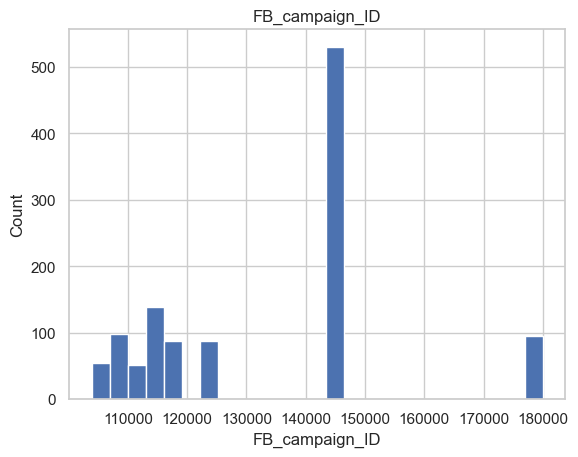

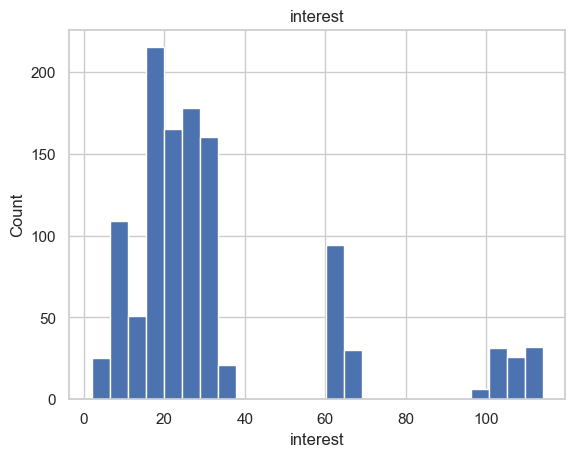

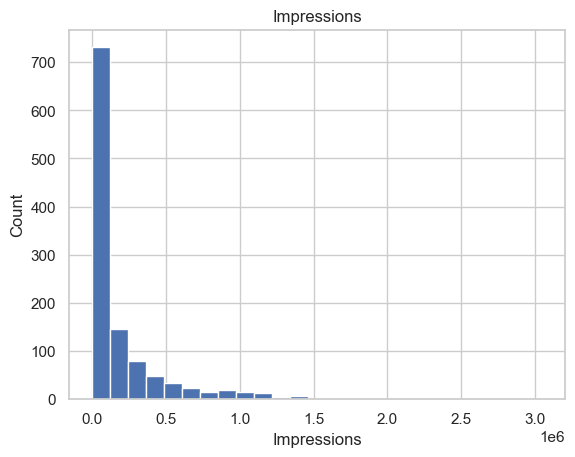

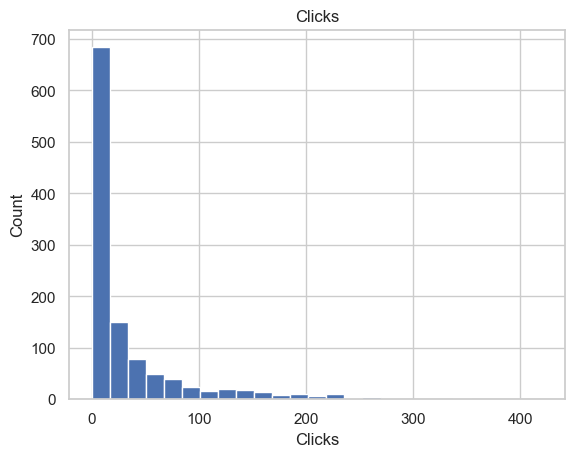

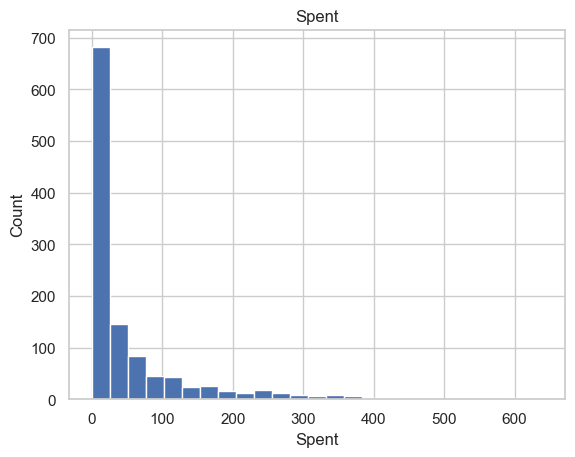

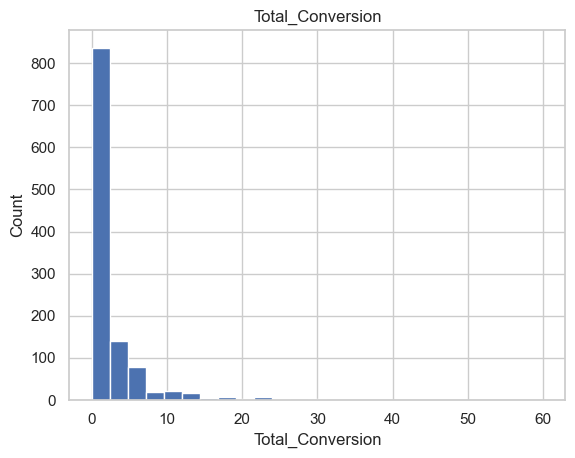

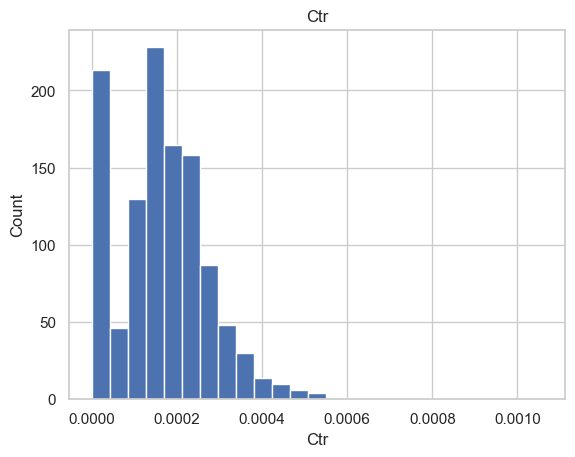

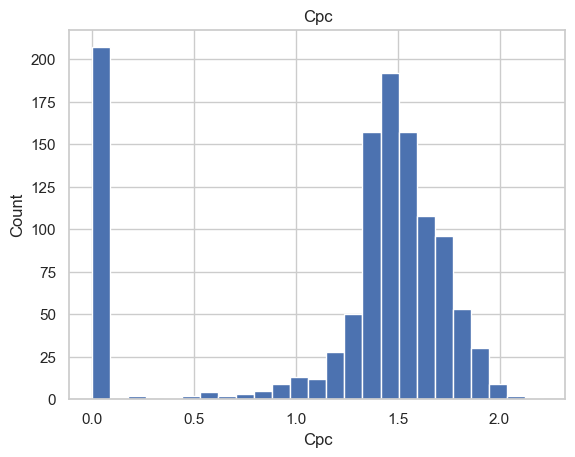

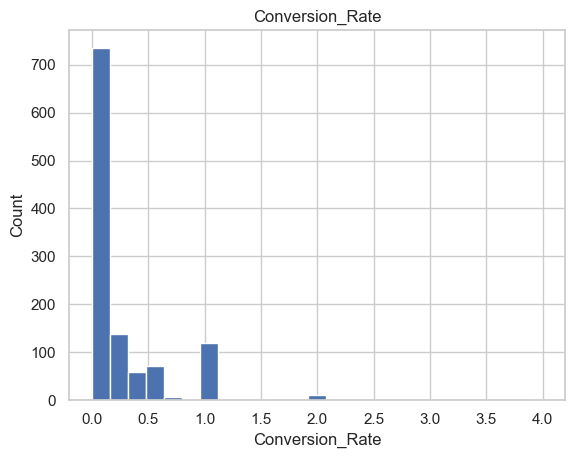

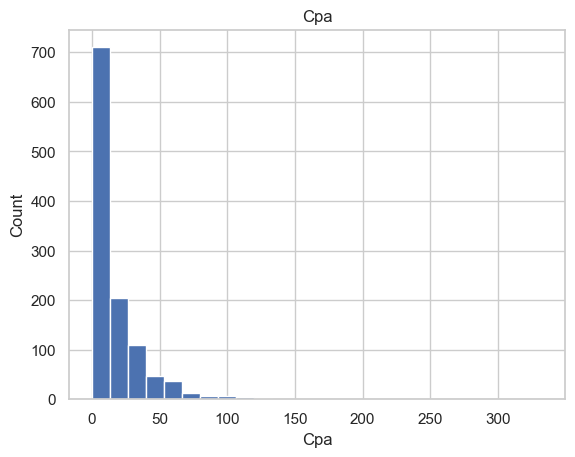

In [41]:
for feature in continuous_features:
    data = df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()